In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statistics import mode
import statistics

## Random Product Price Data with Gamma Distribution

In [41]:
# Product Price Method of Moment or alternatively using Fitting Test
mean = 8597.72750718508
variance = 34896503.0626812
stdev = 5907.32621942289
n = 365000  # Total Policies for ALL TIER

# Mean = k*theta
# Variance = k*(theta^2)

k,theta = [(mean**2/variance), variance/mean]
print(k)
print(theta)

df = np.random.gamma(shape=k, scale=theta, size=n)
# claim = np.random.binomial(n, p, size=n)

2.118290137984027
4058.805426610503


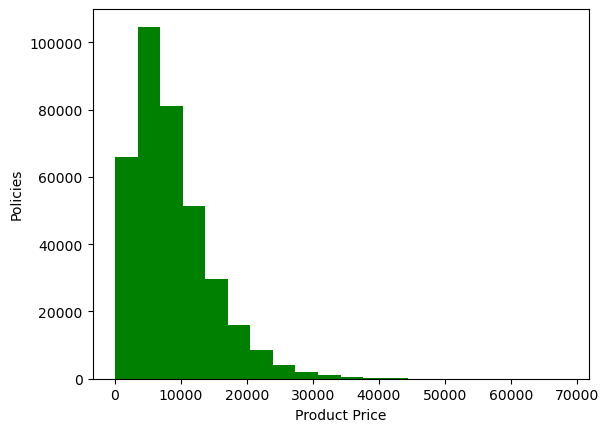

In [42]:
plt.hist( df , density=False, color='green',bins=20)  # density=False would make counts
plt.ylabel('Policies')
plt.xlabel('Product Price')
plt.show()

## Pricing Assumption

In [153]:
max_coverage = 1
profit = 1.1  #(0.6 commission & 0.5 profit)
expense = 0.3

p1 = 0.72/100  # pure premium rate on tier 1
LR1 = 1.7/100 # Predicted Loss Ratio on tier 1

p2 = 0.24/100  # pure premium rate on tier 2
LR2 = 0.6/100 # Predicted Loss Ratio on tier 2

p3 = 0.36/100  # pure premium rate on tier 3
LR3 = 0.68/100 # Predicted Loss Ratio on tier 3

p4 = 0.26/100  # pure premium rate on tier 4
LR4 = 0.5/100 # Predicted Loss Ratio on tier 4


## TLO Tier 1 = product_price 1~5K

In [154]:
df1 = df[(df > 0) & (df<=5000)]
t1 = np.size(df1)
claim1 = np.random.binomial(1,LR1,t1) # Bernoulli Distribution cause only allowable 1 Submit Claim
total_claim1 = np.size(claim1[claim1 >= LR1])
print('Total Policies Tier 1 = ',t1)
print('Total Submit Claim Tier 1 = ',total_claim1)

data1 = pd.concat([pd.DataFrame(df1,columns=['product_price']),pd.DataFrame(claim1,columns=['prob_claim'])], axis =1)
data1['is_claim'] = np.where(data1['prob_claim'] >= LR1, 1,0 )
data1['pure_premium_amount'] = data1.product_price * p1
data1['revenue'] = data1.pure_premium_amount * profit
data1['expense'] = data1.pure_premium_amount * expense
data1['GWP'] = data1.pure_premium_amount + data1.revenue + data1.expense
data1['Proposed_New_GWP'] = data1.GWP.max()
data1['predicted_claim_paid'] = data1.product_price * data1.is_claim * max_coverage

Total Policies Tier 1 =  115039
Total Submit Claim Tier 1 =  1977


In [155]:
data1

,product_price,prob_claim,is_claim,pure_premium_amount,revenue,expense,GWP,Proposed_New_GWP,predicted_claim_paid
0,3359.719264,0,0,24.189979,26.608977,7.256994,58.055949,86.39981,0.0
1,4291.750937,0,0,30.900607,33.990667,9.270182,74.161456,86.39981,0.0
2,2823.332898,0,0,20.327997,22.360797,6.098399,48.787192,86.39981,0.0
3,3283.380638,0,0,23.640341,26.004375,7.092102,56.736817,86.39981,0.0
4,3899.456981,0,0,28.076090,30.883699,8.422827,67.382617,86.39981,0.0
...,...,...,...,...,...,...,...,...,...
115034,1138.774898,0,0,8.199179,9.019097,2.459754,19.678030,86.39981,0.0
115035,3502.207203,0,0,25.215892,27.737481,7.564768,60.518140,86.39981,0.0
115036,4919.927876,0,0,35.423481,38.965829,10.627044,85.016354,86.39981,0.0
115037,2646.740230,0,0,19.056530,20.962183,5.716959,45.735671,86.39981,0.0


In [156]:
Predicted_Total_Pure_Premium_Amount = data1.pure_premium_amount.sum()
Predicted_Total_Claim_Paid = data1.predicted_claim_paid.sum()
Predicted_Total_Earned_GWP = data1.GWP.sum()
Proposed_Minimum_GWP = data1.GWP.max()
Total_Proposed_Minimum_GWP = data1.Proposed_New_GWP.sum()
print('Pred Total Pure Premium Amount =',Predicted_Total_Pure_Premium_Amount)
print('Pred Total Claim Paid = ',Predicted_Total_Claim_Paid)
print('Pred Total Earned GWP = ',Predicted_Total_Earned_GWP)
print('Pred Total Proposed Min GWP =',Total_Proposed_Minimum_GWP)
print('Proposed Minimum GWP = ',Proposed_Minimum_GWP)

Pred Total Pure Premium Amount = 2519342.3707864787
Pred Total Claim Paid =  6017544.5341724865
Pred Total Earned GWP =  6046421.689887548
Pred Total Proposed Min GWP = 9939347.729152065
Proposed Minimum GWP =  86.39980988318801


## TLO Tier 2 = product_price 5K~10K

In [157]:
df2 = df[(df > 5000) & (df<=10000)]
t2 = np.size(df2)
claim2 = np.random.binomial(1,LR2,t2) # Bernoulli Distribution cause only allowable 1 Submit Claim
total_claim2 = np.size(claim2[claim2 >= LR2])
print('Total Policies Tier 2 = ',t2)
print('Total Submit Claim Tier 2 = ',total_claim2)

data2 = pd.concat([pd.DataFrame(df2,columns=['product_price']),pd.DataFrame(claim2,columns=['prob_claim'])], axis =1)
data2['is_claim'] = np.where(data2['prob_claim'] >= LR2, 1,0 )
data2['pure_premium_amount'] = data2.product_price * p2
data2['revenue'] = data2.pure_premium_amount * profit
data2['expense'] = data2.pure_premium_amount * expense
data2['GWP'] = data2.pure_premium_amount + data2.revenue + data2.expense
data2['Proposed_New_GWP'] = data2.GWP.max()
data2['predicted_claim_paid'] = data2.product_price * data2.is_claim * max_coverage

Total Policies Tier 2 =  131339
Total Submit Claim Tier 2 =  782


In [158]:
data2

,product_price,prob_claim,is_claim,pure_premium_amount,revenue,expense,GWP,Proposed_New_GWP,predicted_claim_paid
0,9429.066290,0,0,22.629759,24.892735,6.788928,54.311422,57.599877,0.0
1,9770.928280,0,0,23.450228,25.795251,7.035068,56.280547,57.599877,0.0
2,9447.954337,0,0,22.675090,24.942599,6.802527,54.420217,57.599877,0.0
3,8023.766757,0,0,19.257040,21.182744,5.777112,46.216897,57.599877,0.0
4,9093.337464,0,0,21.824010,24.006411,6.547203,52.377624,57.599877,0.0
...,...,...,...,...,...,...,...,...,...
131334,6581.803427,0,0,15.796328,17.375961,4.738898,37.911188,57.599877,0.0
131335,8101.683341,0,0,19.444040,21.388444,5.833212,46.665696,57.599877,0.0
131336,7702.425405,0,0,18.485821,20.334403,5.545746,44.365970,57.599877,0.0
131337,7957.737998,0,0,19.098571,21.008428,5.729571,45.836571,57.599877,0.0


In [159]:
Predicted_Total_Pure_Premium_Amount = data2.pure_premium_amount.sum()
Predicted_Total_Claim_Paid = data2.predicted_claim_paid.sum()
Predicted_Total_Earned_GWP = data2.GWP.sum()
Proposed_Minimum_GWP = data2.GWP.max()
Total_Proposed_Minimum_GWP = data2.Proposed_New_GWP.sum()
print('Pred Total Pure Premium Amount =',Predicted_Total_Pure_Premium_Amount)
print('Pred Total Claim Paid = ',Predicted_Total_Claim_Paid)
print('Pred Total Earned GWP = ',Predicted_Total_Earned_GWP)
print('Pred Total Proposed Min GWP =',Total_Proposed_Minimum_GWP)
print('Proposed Minimum GWP = ',Proposed_Minimum_GWP)

Pred Total Pure Premium Amount = 2302429.446670323
Pred Total Claim Paid =  5696103.180918821
Pred Total Earned GWP =  5525830.672008774
Pred Total Proposed Min GWP = 7565110.278460133
Proposed Minimum GWP =  57.599877252454625


## TLO Tier 3 = product_price 10K~15K

In [95]:
df3 = df[(df > 10000) & (df<=15000)]
t3 = np.size(df3)
claim3 = np.random.binomial(1,LR3,t3) # Bernoulli Distribution cause only allowable 1 Submit Claim
total_claim3 = np.size(claim3[claim3 >= LR3])
print('Total Policies Tier 3 = ',t3)
print('Total Submit Claim Tier 3 = ',total_claim3)

data3 = pd.concat([pd.DataFrame(df3,columns=['product_price']),pd.DataFrame(claim3,columns=['prob_claim'])], axis =1)
data3['is_claim'] = np.where(data3['prob_claim'] >= LR3, 1,0 )
data3['pure_premium_amount'] = data3.product_price * p3
data3['revenue'] = data3.pure_premium_amount * profit
data3['expense'] = data3.pure_premium_amount * expense
data3['GWP'] = data3.pure_premium_amount + data3.revenue + data3.expense
data3['Proposed_New_GWP'] = data3.GWP.max()
data3['predicted_claim_paid'] = data3.product_price * data3.is_claim * max_coverage

Total Policies Tier 3 =  69968
Total Submit Claim Tier 3 =  484


In [96]:
data3

,product_price,prob_claim,is_claim,pure_premium_amount,revenue,expense,GWP,Proposed_New_GWP,predicted_claim_paid
0,12674.774935,0,0,45.629190,50.192109,13.688757,109.510055,129.599498,0.0
1,13944.814632,0,0,50.201333,55.221466,15.060400,120.483198,129.599498,0.0
2,14189.676451,0,0,51.082835,56.191119,15.324851,122.598805,129.599498,0.0
3,11187.386307,0,0,40.274591,44.302050,12.082377,96.659018,129.599498,0.0
4,10451.249235,0,0,37.624497,41.386947,11.287349,90.298793,129.599498,0.0
...,...,...,...,...,...,...,...,...,...
69963,12729.671604,0,0,45.826818,50.409500,13.748045,109.984363,129.599498,0.0
69964,12843.740303,0,0,46.237465,50.861212,13.871240,110.969916,129.599498,0.0
69965,14978.626141,0,0,53.923054,59.315360,16.176916,129.415330,129.599498,0.0
69966,12184.729102,0,0,43.865025,48.251527,13.159507,105.276059,129.599498,0.0


In [97]:
Predicted_Total_Pure_Premium_Amount = data3.pure_premium_amount.sum()
Predicted_Total_Claim_Paid = data3.predicted_claim_paid.sum()
Predicted_Total_Earned_GWP = data3.GWP.sum()
Proposed_Minimum_GWP = data3.GWP.max()
Total_Proposed_Minimum_GWP = data3.Proposed_New_GWP.sum()
print('Pred Total Pure Premium Amount =',Predicted_Total_Pure_Premium_Amount)
print('Pred Total Claim Paid = ',Predicted_Total_Claim_Paid)
print('Pred Total Earned GWP = ',Predicted_Total_Earned_GWP)
print('Pred Total Proposed Min GWP =',Total_Proposed_Minimum_GWP)
print('Proposed Minimum GWP = ',Proposed_Minimum_GWP)

Pred Total Pure Premium Amount = 3067710.174800597
Pred Total Claim Paid =  5928233.196732704
Pred Total Earned GWP =  7362504.419521433
Pred Total Proposed Min GWP = 9067817.682828251
Proposed Minimum GWP =  129.59949809667637


## TLO Tier 4 = product_price 15K~20K

In [99]:
df4 = df[(df > 15000) & (df<=20000)]
t4 = np.size(df4)
claim4 = np.random.binomial(1,LR4,t4) # Bernoulli Distribution cause only allowable 1 Submit Claim
total_claim4 = np.size(claim4[claim4 >= LR4])
print('Total Policies Tier 4 = ',t4)
print('Total Submit Claim Tier 4 = ',total_claim4)

data4 = pd.concat([pd.DataFrame(df4,columns=['product_price']),pd.DataFrame(claim4,columns=['prob_claim'])], axis =1)
data4['is_claim'] = np.where(data4['prob_claim'] >= LR4, 1,0 )
data4['pure_premium_amount'] = data4.product_price * p4
data4['revenue'] = data4.pure_premium_amount * profit
data4['expense'] = data4.pure_premium_amount * expense
data4['GWP'] = data4.pure_premium_amount + data4.revenue + data4.expense
data4['Proposed_New_GWP'] = data4.GWP.max()
data4['predicted_claim_paid'] = data4.product_price * data4.is_claim * max_coverage

Total Policies Tier 4 =  30131
Total Submit Claim Tier 4 =  153


In [100]:
data4

,product_price,prob_claim,is_claim,pure_premium_amount,revenue,expense,GWP,Proposed_New_GWP,predicted_claim_paid
0,15436.643658,0,0,40.135274,44.148801,12.040582,96.324656,124.798323,0.0
1,17127.392277,0,0,44.531220,48.984342,13.359366,106.874928,124.798323,0.0
2,19850.411533,0,0,51.611070,56.772177,15.483321,123.866568,124.798323,0.0
3,15432.607566,0,0,40.124780,44.137258,12.037434,96.299471,124.798323,0.0
4,15533.719182,0,0,40.387670,44.426437,12.116301,96.930408,124.798323,0.0
...,...,...,...,...,...,...,...,...,...
30126,17991.562855,0,0,46.778063,51.455870,14.033419,112.267352,124.798323,0.0
30127,15984.737350,0,0,41.560317,45.716349,12.468095,99.744761,124.798323,0.0
30128,16301.858660,0,0,42.384833,46.623316,12.715450,101.723598,124.798323,0.0
30129,16229.514115,0,0,42.196737,46.416410,12.659021,101.272168,124.798323,0.0


In [101]:
Predicted_Total_Pure_Premium_Amount = data4.pure_premium_amount.sum()
Predicted_Total_Claim_Paid = data4.predicted_claim_paid.sum()
Predicted_Total_Earned_GWP = data4.GWP.sum()
Proposed_Minimum_GWP = data4.GWP.max()
Total_Proposed_Minimum_GWP = data4.Proposed_New_GWP.sum()
print('Pred Total Pure Premium Amount =',Predicted_Total_Pure_Premium_Amount)
print('Pred Total Claim Paid = ',Predicted_Total_Claim_Paid)
print('Pred Total Earned GWP = ',Predicted_Total_Earned_GWP)
print('Pred Total Proposed Min GWP =',Total_Proposed_Minimum_GWP)
print('Proposed Minimum GWP = ',Proposed_Minimum_GWP)

Pred Total Pure Premium Amount = 1341254.5998336163
Pred Total Claim Paid =  2647015.448407489
Pred Total Earned GWP =  3219011.0396006797
Pred Total Proposed Min GWP = 3760298.260330406
Proposed Minimum GWP =  124.79832266869357
